<a href="https://colab.research.google.com/github/Janainareisnascimento/SBF-Group-cases/blob/main/SBFGroup_Case_JanainaReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case SBF Group - Precificação em varejo**


### **Instalando bibliotecas fundamentais e loading Dataset**

---



In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/retail_price.csv'
retail = pd.read_csv(file_path)
print(retail.head())
retail.info()


  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

### **1) Análise exploratória dos dados (EDA)**

---



In [38]:

print(retail.describe())
print(retail.select_dtypes(include=['object']).apply(pd.Series.nunique))


              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

**Principais Summary of outputs:**

> * **qty (Quantidade):** Em média, cerca de 14,5 itens são vendidos por mês por subcategoria de produto, mas há uma variação considerável, com o desvio padrão quase igual à média. A quantidade máxima vendida é de 122, indicando que algumas subcategorias podem ter volumes de vendas significativamente mais altos do que outras.

> * **total_price (Receita Total):** A receita média mensal por subcategoria de produto é de aproximadamente $ 1422,71 variando amplamente, com desvio padrão de $1700,12, com a receita mensal máxima chegando a $12095. Isso indica que algumas subcategorias são grandes geradoras de receita.

> * **freight_price (Preço do Frete):** O preço médio do frete é de cerca de $20,68, com um desvio padrão de $10,08, mostrando uma variabilidade moderada nos custos de envio.

> * **unit_price (Preço Unitário):** O preço unitário médio é de $106,50, com considerável varia (desvio padrão de $76,18). Os preços variam de $19,90 a $364, sugerindo uma ampla gama de valores de produtos.

> * **product_photos_qty (Quantidade de Fotos do Produto):** Os produtos têm, em média, 2 fotos, mas esse número pode variar até 8, o que poderia afetar o envolvimento dos clientes online.

> * **product_weight_g (Peso do Produto):** O peso médio do produto é de cerca de 1,85 kg, mas os pesos são altamente variáveis (desvio padrão de cerca de 2,27 kg), variando de 0,1 kg a quase 10 kg.

> * **product_score (Pontuação do Produto):** A classificação média é ligeiramente acima de 4 de 5, indicando avaliações geralmente positivas, mas com alguma variabilidade.

> * **customers (Clientes):** Em média, há cerca de 81 clientes por subcategoria de produto por mês, com uma faixa bastante ampla, de um mínimo de 1 cliente a um máximo de 339

> * **comp_1, comp_2, comp_3 (Preços Unitários dos Concorrentes):** Os dados mostram preços de concorrentes, com os preços médios sendo $79,45, $92,93 e $84,18, respectivamente. Há uma variabilidade notável nos preços dos concorrentes, o que pode impactar a estratégia de preços.

> * **ps1, ps2, ps3 (Pontuações de Produto dos Concorrentes):** As pontuações de produtos dos concorrentes também são fornecidas, com médias acima de 4, o que é semelhante à pontuação de produtos da empresa, sugerindo qualidade de produto competitiva.

> * **fp1, fp2, fp3 (Preços de Frete dos Concorrentes):** Os preços médios de frete dos concorrentes também estão listados, com médias de $18,60, $18,62 e $17,97, respectivamente, e eles exibem variabilidade, o que é importante para entender o cenário de custos logísticos.

> * **lag_price (Preço Unitário do Mês Anterior):** O preço médio do mês anterior é semelhante ao preço unitário atual, indicando que os preços mês a mês não flutuam muito em média.

**Para as variáveis categóricas:**

> * **product_id:** Com 52 IDs de produtos exclusivos, o conjunto de dados parece representar uma ampla variedade de produtos individuais ou subcategorias.

> * **product_category_name:** Nove categorias exclusivas sugerem que o conjunto de dados abrange uma variedade de tipos de produtos mais amplos.


In [39]:

category_sales = retail.groupby('product_category_name')['qty'].sum().sort_values(ascending=False)
product_sales = retail.groupby('product_id')['qty'].sum().sort_values(ascending=False)

most_sold_category = category_sales.idxmax()
most_sold_category_qty = category_sales.max()
most_sold_product = product_sales.idxmax()
most_sold_product_qty = product_sales.max()

print("Most sold category:", most_sold_category, "with a total quantity of:", most_sold_category_qty)
print("Most sold product:", most_sold_product, "with a total quantity of:", most_sold_product_qty)



Most sold category: garden_tools with a total quantity of: 2398
Most sold product: furniture2 with a total quantity of: 527


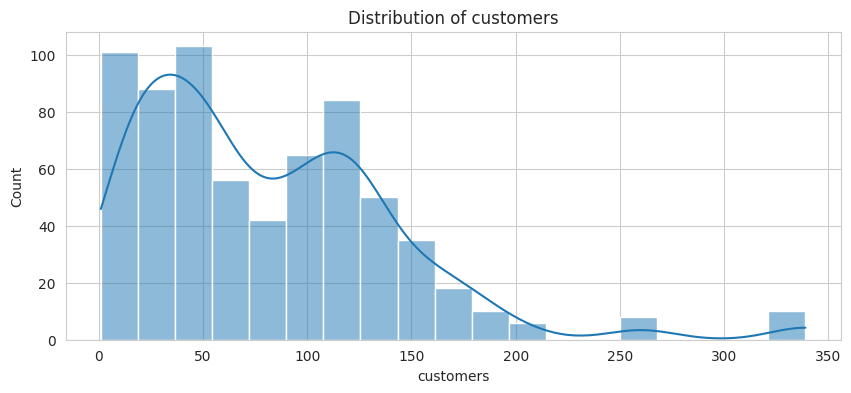

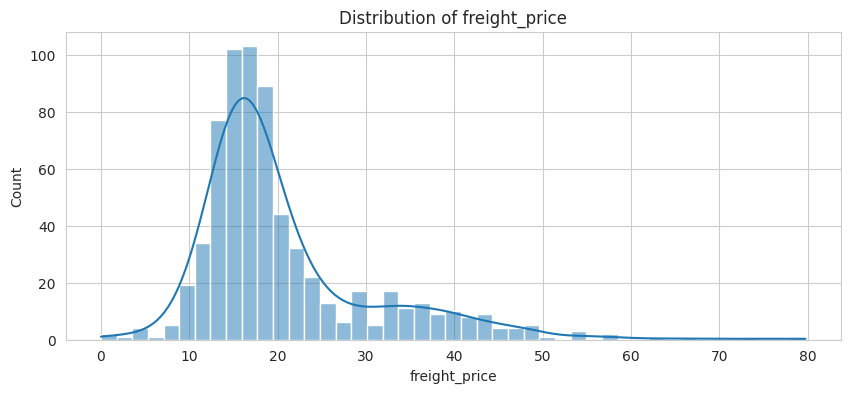

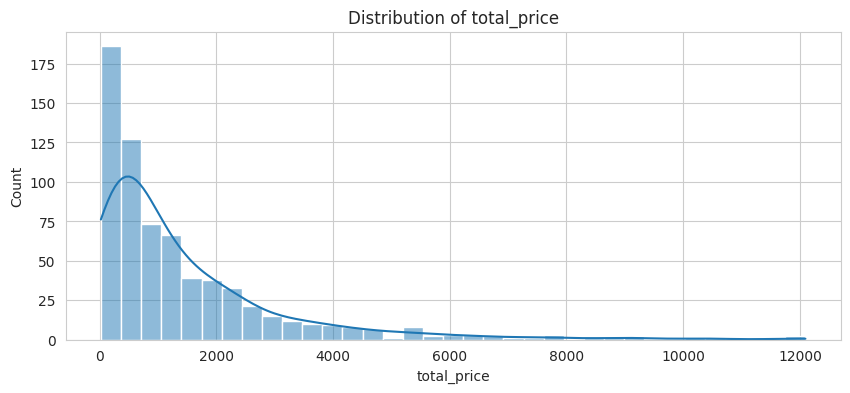

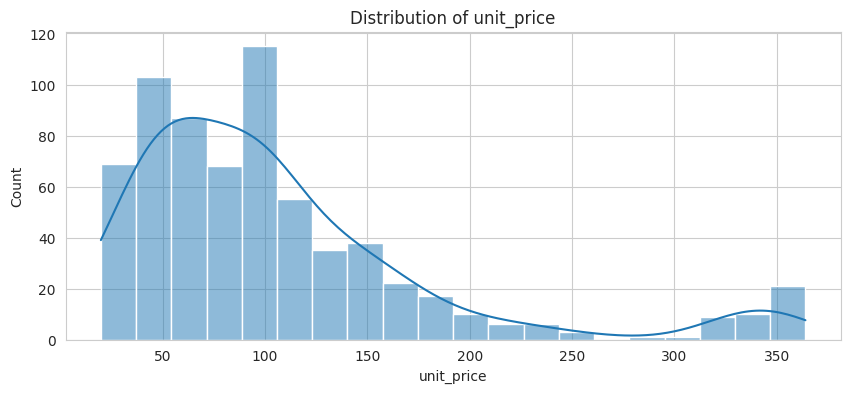

In [40]:

for col in ['customers', 'freight_price', 'total_price', 'unit_price']:
    plt.figure(figsize=(10, 4))
    sns.histplot(retail[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

O histograma para o preço do frete é assimétrico à direita sugerindo que, embora a maioria dos produtos tenha um custo de frete relativamente baixo, há alguns produtos com custos significativamente mais altos.

O grafico de Distribuição do preço total também esta assimétrico à direita e mostra que um grande número de subcategorias de produtos tem receitas mensais totais relativamente baixas, com algumas subcategorias com receitas muito altas. Tal assimetria pode ser devido a um pequeno número de produtos com alta demanda ou compras sazonais aumentando a receita total.

O histograma do preço unitário mostra uma distribuição multimodal, com picos em torno de 50-100 e outro em torno de 250-300, e menos produtos na faixa de preço mais alta. Isso pode indicar a presença de grupos distintos de produtos com preços típicos diferentes ou talvez diferentes faixas de preços dentro da gama de produtos do varejista.

O grafico de distribuição do número de clientes por subcategoria de produto por mês também esta assimétrico à direita. A maioria das subcategorias de produtos tem uma base de clientes relativamente pequena, enquanto algumas têm uma base de clientes muito maior. Isso pode sugerir que certos produtos têm um amplo apelo ou estão em alta demanda, contribuindo para um maior número de clientes.

Essas distribuições destacam a variabilidade dentro do dataset e sugerem que pode haver subcategorias ou produtos específicos que são valores atípicos ou desempenhadores excepcionalmente altos em termos de custo de frete, receita total, preço e apelo ao cliente, o que pode gerar implicações significativas para estratégias de negócios, preços, marketing e gestão de estoques.

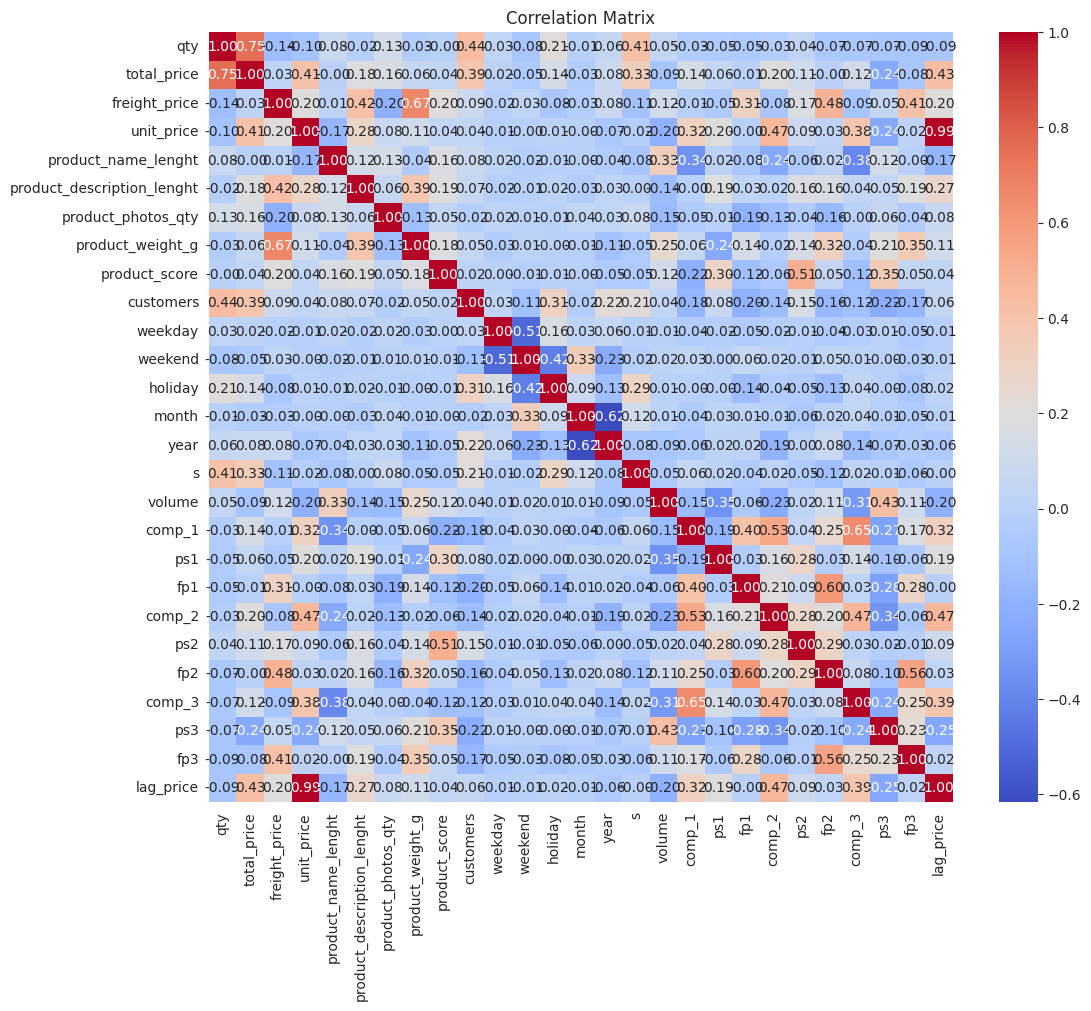

In [41]:

numeric_cols = retail.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Principais outputs - Correlation Matrix (Heatmap):**


**Principais Correlações Positivas Fortes (Vermelho Escuro)**

> * **qty e total_price:** Coeficiente de correlação de 0,75, o que indica que uma parte substancial da variância na receita total pode ser explicada pelo número de itens vendidos.
> * **unit_price e lag_price:** A correlação de 0,99 é quase perfeita, sugerindo que os preços do mês atual seguem de perto os preços do mês anterior, sugerindo preços estáveis ao longo do tempo.

**Principais Correlações Positivas Moderadas (Vermelho Claro)**

>* **unit_price e product_photos_qty:** Com uma correlação de 0,30, há uma tendência moderada para produtos com preços mais altos terem mais fotos.


### **2) Analise competitiva**

---



**2.1) Comparação do Preço Unitário Médio e da Pontuação do Produto por Categoria**

In [42]:

retailer_averages = retail.groupby('product_category_name').agg({
    'unit_price': 'mean',
    'product_score': 'mean'
}).reset_index()


for i in range(1, 4):
    retailer_averages[f'comp_{i}_price_mean'] = retail.groupby('product_category_name').agg({
        f'comp_{i}': 'mean'
    }).reset_index()[f'comp_{i}']

    retailer_averages[f'comp_{i}_score_mean'] = retail.groupby('product_category_name').agg({
        f'ps{i}': 'mean'
    }).reset_index()[f'ps{i}']


for i in range(1, 4):
    retailer_averages[f'price_competitive_edge_comp_{i}'] = retailer_averages['unit_price'] - retailer_averages[f'comp_{i}_price_mean']
    retailer_averages[f'score_competitive_edge_comp_{i}'] = retailer_averages['product_score'] - retailer_averages[f'comp_{i}_score_mean']

print(retailer_averages[['product_category_name', 'price_competitive_edge_comp_1', 'score_competitive_edge_comp_1',
                         'price_competitive_edge_comp_2', 'score_competitive_edge_comp_2',
                         'price_competitive_edge_comp_3', 'score_competitive_edge_comp_3']])


   product_category_name  price_competitive_edge_comp_1  \
0         bed_bath_table                      -7.637357   
1  computers_accessories                     -19.972852   
2         consoles_games                      -0.067749   
3             cool_stuff                      11.374337   
4        furniture_decor                     -15.729376   
5           garden_tools                      22.036153   
6          health_beauty                      99.339603   
7              perfumery                      29.662714   
8          watches_gifts                      29.351977   

   score_competitive_edge_comp_1  price_competitive_edge_comp_2  \
0                       0.008197                     -21.386345   
1                      -0.211594                     -23.239519   
2                      -0.122727                       0.067749   
3                      -0.003509                     -12.974669   
4                      -0.106250                      21.428012   
5      

**2.1) Interpretação da Posição Competitiva em relacao a concorrentes 1,2 e 3**

In [43]:

def interpret_competitive_position(row, price_col, score_col):
    if row[price_col] < 0 and row[score_col] > 0:
        return 'More competitive (Lower Price, Higher Score)'
    elif row[price_col] < 0:
        return 'Price competitive (Lower Price)'
    elif row[score_col] > 0:
        return 'Quality competitive (Higher Score)'
    else:
        return 'Less competitive'

for i in range(1, 4):
    price_col = f'price_competitive_edge_comp_{i}'
    score_col = f'score_competitive_edge_comp_{i}'
    retailer_averages[f'competitive_position_comp_{i}'] = retailer_averages.apply(lambda row: interpret_competitive_position(row, price_col, score_col), axis=1)

print(retailer_averages[['product_category_name', 'competitive_position_comp_1', 'competitive_position_comp_2', 'competitive_position_comp_3']])


   product_category_name                   competitive_position_comp_1  \
0         bed_bath_table  More competitive (Lower Price, Higher Score)   
1  computers_accessories               Price competitive (Lower Price)   
2         consoles_games               Price competitive (Lower Price)   
3             cool_stuff                              Less competitive   
4        furniture_decor               Price competitive (Lower Price)   
5           garden_tools            Quality competitive (Higher Score)   
6          health_beauty                              Less competitive   
7              perfumery            Quality competitive (Higher Score)   
8          watches_gifts                              Less competitive   

          competitive_position_comp_2  \
0     Price competitive (Lower Price)   
1     Price competitive (Lower Price)   
2  Quality competitive (Higher Score)   
3     Price competitive (Lower Price)   
4  Quality competitive (Higher Score)   
5            

**Posições Mais Competitivas:**

A varejista se destaca na categoria "**Computers & Accessories"** com preços significativamente mais baixos em relação aos Concorrentes 1 e 2 e se sobressai na qualidade do produto em relação ao Concorrente 3. Para "**Garden Tools"**, a qualidade dos produtos é uma vantagem competitiva em relação aos Concorrentes 1 e 3. As categorias **"Furniture & Decor"** e **"Watches & Gifts"** se beneficiam de preços mais baixos e melhor qualidade em relação aos Concorrentes 1 e 3, respectivamente.

**Posições Menos Competitivas:**

Desafios surgem na categoria **"Cool Stuff"**, onde a varejista enfrenta dificuldades para competir tanto em preço quanto em qualidade com todos os concorrentes. **"Health & Beauty"** também apresenta uma dificuldade, com os preços da varejista sendo consideravelmente mais altos, especialmente em relação ao Concorrente 1, apesar da melhor qualidade em comparação com os Concorrentes 2 e 3. Além disso, na **"Perfumery"**, a varejista não apresenta uma vantagem competitiva em relação ao Concorrente 3.

### **3) Variáveis que afetam o preço de venda**

---



In order to create the best model, I've run this model with all predictors to check the variables with p-values under 0.05

In [44]:
import statsmodels.api as sm

independent_vars = [
    'qty', 'freight_price', 'product_description_lenght', 'product_photos_qty',
    'product_score', 'product_weight_g', 'weekday', 'weekend', 'holiday',
    'comp_1', 'comp_2', 'comp_3', 'customers', 'month', 'year', 's', 'volume',
    'ps1', 'ps2', 'ps3', 'fp1', 'fp2', 'fp3', 'lag_price'
]


X = sm.add_constant(retail[independent_vars])
y = retail['unit_price']

# Fitting the ordinary least squares (OLS) model (m1)
m1 = sm.OLS(y, X).fit()


print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:             unit_price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2672.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:45:05   Log-Likelihood:                -2333.0
No. Observations:                 676   AIC:                             4716.
Df Residuals:                     651   BIC:                             4829.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               


Para determinar quais variáveis impactam significativamente o preço de venda dos produtos, conduzi uma análise de regressão de mínimos quadrados ordinários (OLS) incluindo as potenciais variaveis resposta. Os altos valores de R-Squared (0.99) e Adjusted R-Squared (0.99) apontam que esse modelo possui um alto valor explicativo, em torno de 99%. Nesse sentido,  ao examinar os p-values dos coeficientes de regressão, foquei em identificar variáveis com p-values abaixo de 0,05, pois possuem alta significância estatística. O summary outputs  revelou que quantity **(qty)**, product description length **(product_description_length)**, product score **(product_score)**, competitor 2's price **(comp_2)**, sales volume **(volume)**, competitor 2's product score **(ps2)** e o preço defasado do período anterior **(lag_price)** afetam significativamente o preço unitário. Essas variáveis demonstram um impacto mensurável nos preços, sugerindo que devem ser cuidadosamente consideradas em estratégias de preços e decisões de negócios.

### **4) Analise de demanda de produtos**

---



In [45]:


# Converting 'month_year' to datetime and extract 'month' and 'year'
retail['month_year'] = pd.to_datetime(retail['month_year'], format='%d-%m-%Y')
retail['month'] = retail['month_year'].dt.month
retail['year'] = retail['month_year'].dt.year

# Aggregating sales data by product category
category_sales = retail.groupby(['product_category_name', 'year', 'month']).agg(total_qty=('qty', 'sum')).reset_index()
print("Vendas agregadas por Categoria:")
print(category_sales.head())

# Aggregating sales data by individual product
product_sales = retail.groupby(['product_id', 'year', 'month']).agg(total_qty=('qty', 'sum')).reset_index()
print("Vendas agregadas por produto:")
print(product_sales.head())


Vendas agregadas por Categoria:
  product_category_name  year  month  total_qty
0        bed_bath_table  2017      2          2
1        bed_bath_table  2017      3         22
2        bed_bath_table  2017      4         34
3        bed_bath_table  2017      5         60
4        bed_bath_table  2017      6         64
Vendas agregadas por produto:
  product_id  year  month  total_qty
0       bed1  2017      5          1
1       bed1  2017      6          3
2       bed1  2017      7          6
3       bed1  2017      8          4
4       bed1  2017      9          2


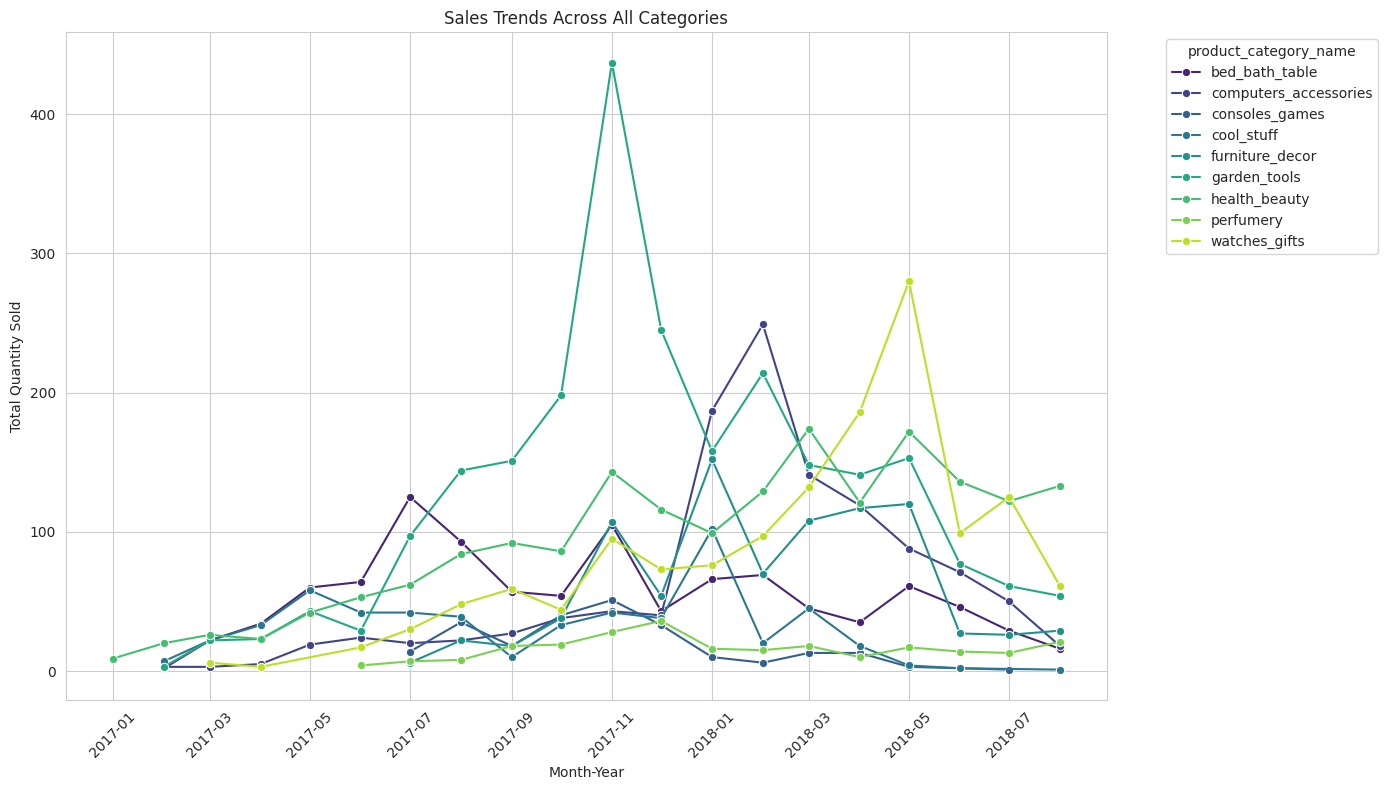

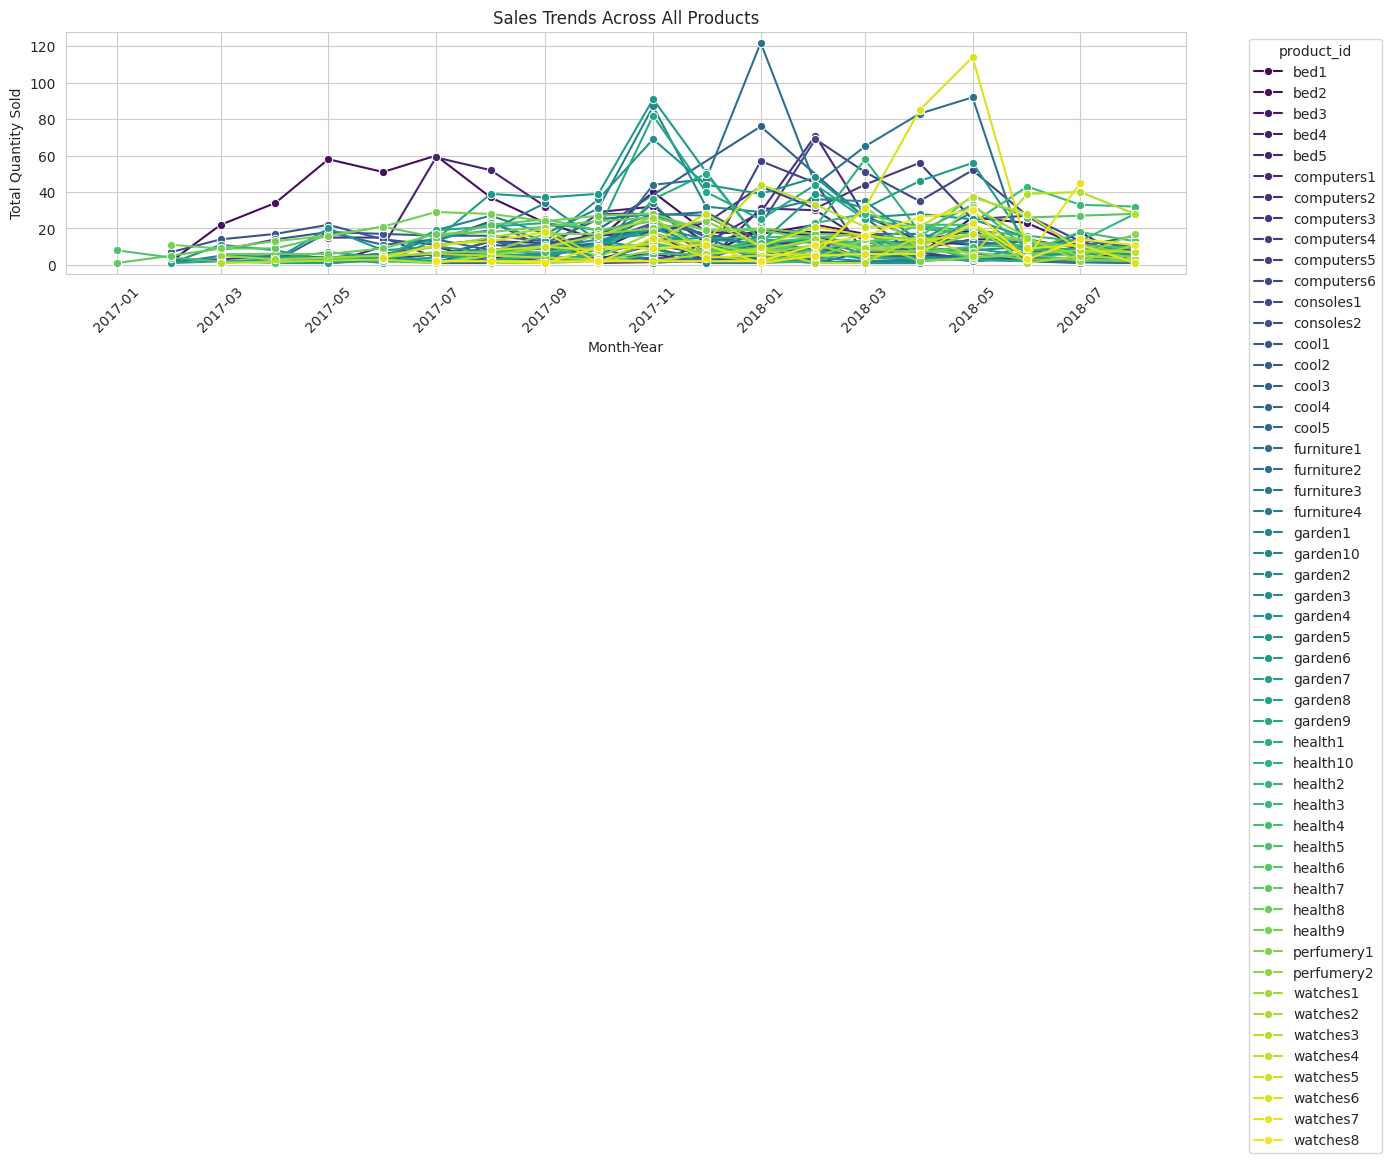

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

def plot_combined_sales_trends(data, category_col, title):
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data, x='month_year', y='total_qty', hue=category_col, marker="o", palette='viridis')
    plt.title(title)
    plt.xlabel('Month-Year')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.legend(title=category_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

category_sales['month_year'] = pd.to_datetime(category_sales.assign(day=1)[['year', 'month', 'day']])
product_sales['month_year'] = pd.to_datetime(product_sales.assign(day=1)[['year', 'month', 'day']])


plot_combined_sales_trends(category_sales, 'product_category_name', 'Sales Trends Across All Categories')


plot_combined_sales_trends(product_sales, 'product_id', 'Sales Trends Across All Products')





A partir da análise dos gráficos acima, é possível extrair insights sobre a previsão de demanda por categorias (gráfico 1) e por produtos (gráfico 2) com base nas vendas realizadas. Os principais insights são:

**Tendências de Vendas em Todas as Categorias:**

O primeiro gráfico demonstra que as vendas não são consistentes entre as diferentes categorias de produtos. Por exemplo, algumas categorias, como "bed_bath_table", apresentam picos que podem corresponder a estações específicas ou promoções. A flutuação nas vendas sugere que enquanto algumas categorias mantêm um nível de demanda consistente, outras são mais propensas a picos e quedas, possivelmente influenciadas por fatores externos como estações, feriados ou campanhas de marketing. A categoria "health_beauty" mostra um pico notável, o que poderia indicar um evento pontual que impulsionou as vendas ou um valor atípico nos dados. Isso requer investigação adicional para determinar a causa e se é uma tendência sustentável ou uma ocorrência singular.

**Tendências de Vendas em Todos os Produtos:**

O segundo gráfico mostra as tendências de vendas individuais de produtos, onde cada produto dentro das categorias segue seu padrão único, alguns exibindo vendas mais consistentes enquanto outros têm variabilidade significativa. Para a maioria dos produtos, a demanda é relativamente baixa, com picos esporádicos, possivelmente ligados a atividades promocionais ou sazonalidade. Alguns produtos, como os rotulados como "bed1" ou "computers1", mostram picos mais altos, sugerindo que podem ser itens populares ou essenciais com maior demanda.

**Previsão de Demanda por Categoria e Produto:**

Embora os gráficos forneçam uma representação visual das vendas ao longo do tempo, prever a demanda futura com alta precisão provavelmente exigiria análises de séries temporais mais sofisticadas ou modelos de previsão, como ARIMA para séries estacionárias ou SARIMAX para séries com sazonalidade. A sazonalidade aparente e as tendências em certas categorias ou produtos sugerem que modelos de previsão de demanda poderiam ser viáveis. No entanto, eles precisariam ser construídos e validados usando dados históricos, considerando fatores como sazonalidade, tendências e comportamento cíclico.

**4.1) Teste inicial ARIMA para forecast de demanda**

In [47]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


retail['month_year'] = pd.to_datetime(retail['month_year'], format='%m-%Y')
retail.set_index('month_year', inplace=True)

monthly_sales = retail['qty'].resample('M').sum()

model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_conf = forecast.conf_int()


print(forecast.predicted_mean)
print(pred_conf)


2018-09-30    361.796299
2018-10-31    351.301400
2018-11-30    355.126298
2018-12-31    353.732302
2019-01-31    354.240348
2019-02-28    354.055189
2019-03-31    354.122671
2019-04-30    354.098077
2019-05-31    354.107040
2019-06-30    354.103773
2019-07-31    354.104964
2019-08-31    354.104530
Freq: M, Name: predicted_mean, dtype: float64
             lower qty    upper qty
2018-09-30    5.035816   718.556781
2018-10-31  -82.028669   784.631468
2018-11-30 -164.264574   874.517170
2018-12-31 -232.396678   939.861282
2019-01-31 -294.042051  1002.522747
2019-02-28 -350.156326  1058.266704
2019-03-31 -402.151118  1110.396459
2019-04-30 -450.788935  1158.985088
2019-05-31 -496.650450  1204.864530
2019-06-30 -540.163807  1248.371353
2019-07-31 -581.655491  1289.865419
2019-08-31 -621.384183  1329.593244


Os resultafos do modelo ARIMA indicam o seguinte:

**2018-09-30 a 2019-08-31:** A previsão sugere estabilidade ao longo do período previsto, oscilando em torno de 354 a 361 unidades. Essa estabilidade pode implicar a falta de mudanças significativas no mercado ou estratégias existentes eficazes se estiver alinhada com os objetivos da organização.

**Intervalos de Confiança:**Os valores lower qty e upper qty fornecem os limites dos intervalos de confiança de 95% para as previsões:

**Ampla Variação:** A ampla variação entre os limites inferior e superior (por exemplo, 5,04 a 718,56 em 2018-09-30) indica um alto nível de incerteza nas previsões.

**Redução da Incerteza ao Longo do Tempo:** Inicialmente, os intervalos de confiança são muito amplos, indicando maior incerteza. No entanto, à medida que a previsão avança em direção a 2019, a largura dos intervalos diminui (por exemplo, estreitando-se para uma faixa de cerca de 700 até 2019-08-31 a partir de quase 720 inicialmente). Esse padrão geralmente sugere uma maior confianca do modelo em suas previsões à medida que se aproxima da faixa de dados conhecida ou à medida que os efeitos de certas variáveis se tornam mais previsíveis.

De todo modo, assim como indicado anteriormente ana analise de graficos de categoria e produtos acima, seria necessaria a estruturacao de modelos preditivos mais estruturados para demanda de produtos.

### **5) Modelo preditivo para os preços dos produtos**

---



**5.1) Data preparation e tranformacao de variaveis**

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


file_path = '/content/retail_price.csv'
retail = pd.read_csv(file_path)


retail['month_year'] = pd.to_datetime(retail['month_year'], format='%d-%m-%Y')


retail = pd.get_dummies(retail, columns=['product_category_name', 'product_id'], drop_first=True)


retail.fillna(retail.mean(), inplace=True)

# Feature selection
features = ['qty', 'freight_price', 'product_description_lenght', 'product_photos_qty',
            'product_score', 'product_weight_g', 'weekday', 'weekend', 'holiday',
            'comp_1', 'comp_2', 'comp_3', 'customers', 'month', 'year', 's', 'volume',
            'ps1', 'ps2', 'ps3', 'fp1', 'fp2', 'fp3', 'lag_price']
X = retail[features]
y = retail['unit_price']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


**5.2) Model Selection**

>* **Modelo 1: OLS**

In [49]:
import statsmodels.api as sm


X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:             unit_price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1742.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:45:10   Log-Likelihood:                -1640.4
No. Observations:                 473   AIC:                             3331.
Df Residuals:                     448   BIC:                             3435.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.5656      0.369    288.807      0.0

>* **Modelo 2: Ramdom Forest (machine learning 1)**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}")


Random Forest MSE: 50.05101032318967, MAE: 3.367100914911344, R²: 0.9917420852538162


>* **Modelo 3: Gradient Boosting (machine learning 2)**

In [51]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)


mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}")


Gradient Boosting MSE: 38.85291103181048, MAE: 3.3915108990478253, R²: 0.9935896593321494


**5.3) Model Training usando Lasso Regression**

In [52]:
from sklearn.linear_model import LassoCV


lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso}, MAE: {mae_lasso}, R²: {r2_lasso}")


Lasso MSE: 54.88204926002185, MAE: 3.983317336145515, R²: 0.9909450122792999


In [53]:

performance_summary = pd.DataFrame({
    'Model': ['OLS', 'Random Forest', 'Gradient Boosting', 'Lasso'],
    'MSE': [ols_model.mse_resid, mse_rf, mse_gb, mse_lasso],
    'MAE': ['N/A', mae_rf, mae_gb, mae_lasso],
    'R²': [ols_model.rsquared, r2_rf, r2_gb, r2_lasso]
})

print(performance_summary)


               Model        MSE       MAE        R²
0                OLS  63.588587       N/A  0.989398
1      Random Forest  50.051010  3.367101  0.991742
2  Gradient Boosting  38.852911  3.391511  0.993590
3              Lasso  54.882049  3.983317  0.990945


De acordo com os outputs acima, o modelo 3 com utilizacao da tecnica de machine learning "Gradiente Boosting" se mostrou um modelo com melhor performance e, por isso, for selecionado como o melhor modelo preditivo.

**5.5) Cross-validation**

In [54]:
from sklearn.model_selection import cross_val_score


gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


cv_scores = cross_val_score(gradient_boosting_model, X, y, cv=10, scoring='neg_mean_squared_error')


mean_cv_scores = -np.mean(cv_scores)
std_cv_scores = np.std(cv_scores)

print(f"Mean CV MSE: {mean_cv_scores}, Standard Deviation: {std_cv_scores}")


Mean CV MSE: 111.06090820278268, Standard Deviation: 118.7939824635904


**5.5) Model fit em todo o Dataset**

In [55]:

final_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
final_model.fit(X, y)

from joblib import dump
dump(final_model, 'final_gradient_boosting_model.joblib')

print("Model trained on the entire dataset and saved.")


Model trained on the entire dataset and saved.


**5.6) Testando Learning Curve**

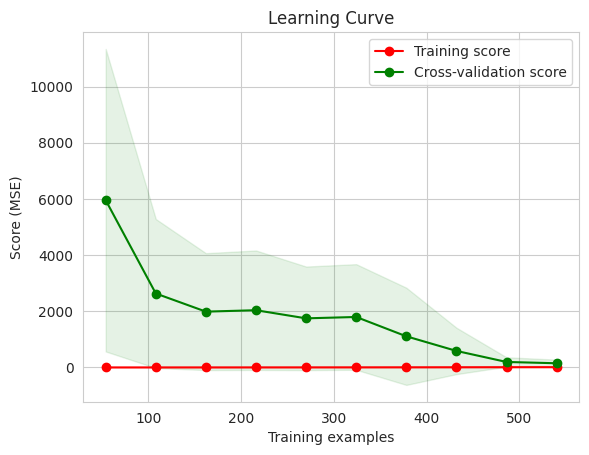

In [56]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different sizes of the training dataset
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error'  # Negative MSE to maximize (the higher, the better)
)

train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score (MSE)")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


 **Principais insights do grafico de Learning Curve:**

**Training Score Trend:** O alto score inicial de treinamento indica um ajuste inicial bom para pequenos conjuntos de dados, que naturalmente diminui à medida que o tamanho do conjunto de dados aumenta e a complexidade cresce.

**Cross-validation Score Trend:** O baixo score inicial significa sub-ajuste, melhorando com mais dados e depois se estabilizando, sugerindo que simplesmente aumentar o volume de dados não levará a ganhos significativos no desempenho do modelo.

**Confidence Interval Width:** A área esverdeada ao redor das linhas de score de treinamento e validação sugere variância no desempenho do modelo; as áreas mais amplas indicam maior variabilidade.

**Convergence of Training and Validation Scores:** À medida que o número de exemplos de treinamento aumenta, a convergência desses dois scores é um sinal positivo da capacidade do modelo de generalizar sem overfitting ou underfitting.

**Mean Squared Error (MSE):** Os valores de MSE permanecem relativamente altos ao longo do tempo, implicando áreas de melhoria potencial para o poder preditivo do modelo.

Em essência, o modelo se beneficia de dados adicionais até certo ponto. Para aprimorar ainda mais o modelo, em vez de adicionar mais dados, deve-se considerar o refinamento futuro do modelo por meio de feature engineering e ajuste de hiperparâmetros.

### **6) Otimização da política de preços**

---




A política de preços do varejista poderia ser otimizada pela utilização de análise de dados, modelos de aprendizado de máquina (machine learning) e ainda LLMs (large language models) para análise de sentimento, feedbacks, reviews e avaliações e engajamento dos clientes nas redes sociais acerca dos produtos, fortalecendo as estratégias de e-commerce e social commerce da varejista. Seguem abaixo modelos simulados de otimização de preços ( Preços Dinâmicos com Base em Previsão de Demanda, Teste A/B e ajuste de preco real time) a partir dos dados disponíveis em nosso dataset:

**6.1) Preços Dinâmicos com Base em Previsão de Demanda**

In [57]:
import pandas as pd
import numpy as np


np.random.seed(42)
forecasted_demand = pd.DataFrame({
    'month_year': pd.date_range(start='2021-01-01', periods=12, freq='M'),
    'predicted_demand': np.random.randint(100, 500, size=12),
    'unit_price': np.random.uniform(10, 100, size=12)
})


forecasted_demand['adjusted_price'] = np.where(
    forecasted_demand['predicted_demand'] > forecasted_demand['predicted_demand'].quantile(0.75),
    forecasted_demand['unit_price'] * 1.1,  # Increase price by 10% during high demand
    forecasted_demand['unit_price'] * 0.9   # Decrease price by 10% during low demand
)

print(forecasted_demand[['month_year', 'predicted_demand', 'unit_price', 'adjusted_price']])


   month_year  predicted_demand  unit_price  adjusted_price
0  2021-01-31               202   40.033775       36.030398
1  2021-02-28               448   22.858014       25.143815
2  2021-03-31               370   68.579963       75.437959
3  2021-04-30               206   15.077042       13.569338
4  2021-05-31               171   74.979890       67.481901
5  2021-06-30               288   94.469744       85.022769
6  2021-07-31               120   10.070089        9.063080
7  2021-08-31               202   99.299040       89.369136
8  2021-09-30               221   65.573336       59.016002
9  2021-10-31               314   65.048784       58.543906
10 2021-11-30               430   10.635967       11.699564
11 2021-12-31               187   12.075618       10.868056


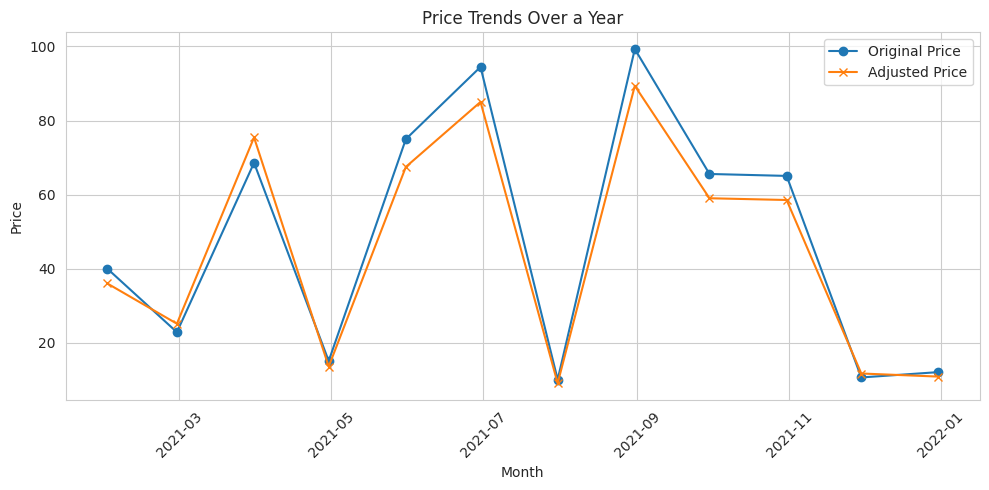

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
forecasted_demand = pd.DataFrame({
    'month_year': pd.date_range(start='2021-01-01', periods=12, freq='M'),
    'predicted_demand': np.random.randint(100, 500, size=12),
    'unit_price': np.random.uniform(10, 100, size=12)
})

forecasted_demand['adjusted_price'] = np.where(
    forecasted_demand['predicted_demand'] > forecasted_demand['predicted_demand'].quantile(0.75),
    forecasted_demand['unit_price'] * 1.1,  # Increase price by 10% during high demand
    forecasted_demand['unit_price'] * 0.9   # Decrease price by 10% during low demand
)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(forecasted_demand['month_year'], forecasted_demand['unit_price'], label='Original Price', marker='o')
plt.plot(forecasted_demand['month_year'], forecasted_demand['adjusted_price'], label='Adjusted Price', marker='x')
plt.title('Price Trends Over a Year')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**6.2) Teste A/B para Price sensitivity**

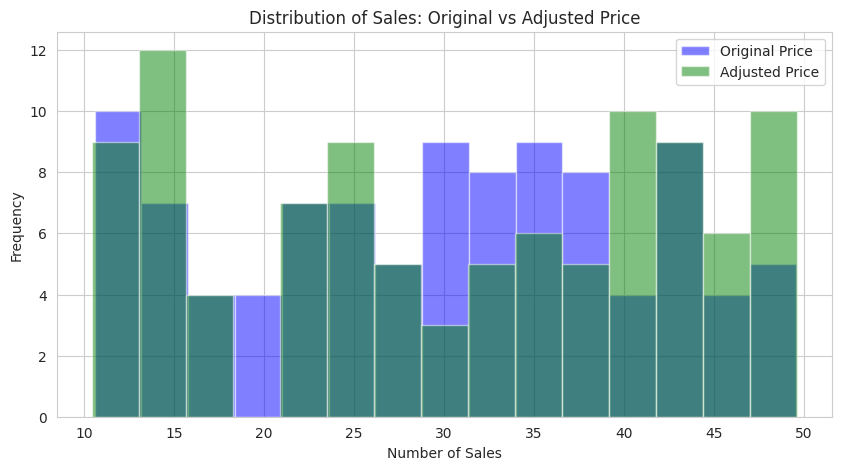

Average sales - Original: 29.524738366018088, Adjusted: 30.627445075041322


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(42)
sales_data = pd.DataFrame({
    'original_price': np.random.uniform(10, 50, 100),
    'adjusted_price': np.random.uniform(10, 50, 100) * np.random.choice([0.95, 1.05], 100),
    'sales_original': np.random.uniform(10, 50, 100),
    'sales_adjusted': np.random.uniform(10, 50, 100)
})


average_sales_original = sales_data['sales_original'].mean()
average_sales_adjusted = sales_data['sales_adjusted'].mean()

# Plot the sales distributions
plt.figure(figsize=(10, 5))
plt.hist(sales_data['sales_original'], alpha=0.5, label='Original Price', color='blue', bins=15)
plt.hist(sales_data['sales_adjusted'], alpha=0.5, label='Adjusted Price', color='green', bins=15)
plt.title('Distribution of Sales: Original vs Adjusted Price')
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Average sales - Original: {average_sales_original}, Adjusted: {average_sales_adjusted}")


**6.3) Ajuste de preco Real-time**

  product_id  price  inventory  new_price
0          A     20          5       22.0
1          B     30         15       28.5
2          C     40          8       44.0


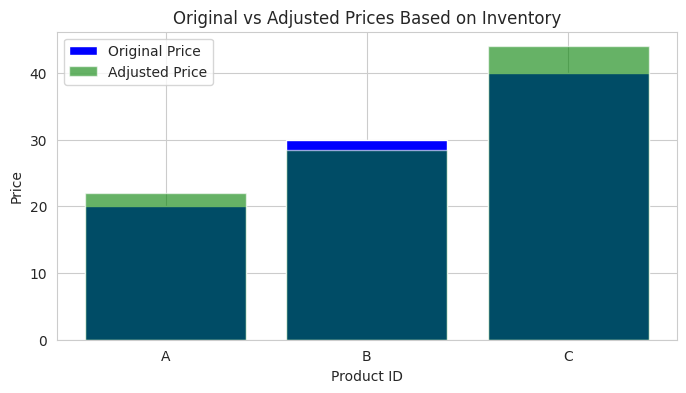

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

def adjust_price_based_on_inventory(inventory_data):
    inventory_data['new_price'] = inventory_data.apply(
        lambda x: x['price'] * 1.1 if x['inventory'] < 10 else x['price'] * 0.95,
        axis=1
    )
    return inventory_data


inventory_data = pd.DataFrame({
    'product_id': ['A', 'B', 'C'],
    'price': [20, 30, 40],
    'inventory': [5, 15, 8]
})


adjusted_inventory = adjust_price_based_on_inventory(inventory_data)
print(adjusted_inventory)

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(adjusted_inventory['product_id'], adjusted_inventory['price'], color='blue', label='Original Price')
plt.bar(adjusted_inventory['product_id'], adjusted_inventory['new_price'], color='green', alpha=0.6, label='Adjusted Price')
plt.xlabel('Product ID')
plt.ylabel('Price')
plt.title('Original vs Adjusted Prices Based on Inventory')
plt.legend()
plt.show()


### **7) Utilização de outras variáveis**

---



Além das variáveis disponíveis no dataset, para aumentar a acurácia dos modelos de machine learning e LLM mencionados, eu realizaria integrações de sistemas (na lógica de DevOps, como feito na BU NWB) ERP, CRM e redes sociais para obter as seguintes variáveis adicionais:

**Demografia dos Clientes:** Informações sobre idade, gênero, nível de renda e localização geográfica do cliente poderiam permitir estratégias de preços personalizadas e esforços de marketing mais direcionados, além de criar sistemas de recomendação content-based, collaborative e híbridos de outros produtos do nosso portfólio;

**Indicadores Econômicos:** Variáveis macroeconômicas como taxas de inflação, taxas de emprego e índices de confiança do consumidor poderiam ajudar a prever mudanças no comportamento de gastos do consumidor e ajustar os preços de acordo.

**Sazonalidade e Dados Meteorológicos:** Além das tendências sazonais básicas, condições climáticas específicas podem afetar significativamente a demanda por certos produtos. Integrar dados meteorológicos pode ajudar a prever picos na demanda por produtos relacionados ao clima ou desastres naturais, como tem acontecido no Brasil (Brumadinho, Teresópolis, Litoral Norte de SP)

**Níveis de Estoque:** Dados em tempo real sobre os níveis de estoque podem ajudar a implementar estratégias de preços que evitem excesso de estoque ou falta de estoque, otimizando tanto a receita quanto o gerenciamento de estoque.

**Dados Históricos de Vendas com Granularidade Mais Fina**: Dados de vendas mais detalhados, incluindo horário ou dia da semana da compra, podem oferecer insights sobre padrões de compra do consumidor, ajudando a otimizar os preços com base nos horários de compra de pico.

**Métricas de Fidelidade e Engajamento dos Clientes:** Dados sobre programas de fidelidade dos clientes, frequência de compras e engajamento com a marca por meio de diversos canais podem ajudar a ajustar preços e promoções para melhorar a retenção de clientes.

**Análise de Sentimento nas Redes Sociais:** Percepções das redes sociais podem fornecer dados em tempo real sobre as percepções dos clientes e tendências de mercado, influenciando rapidamente as decisões de preços em resposta ao sentimento público e, com isso, aplicarmos LLMs em nossos modelos.

### **8) Pipeline de dados**

---




Ao abordar os desafios de otimização de preços e previsões de demanda para o varejista, proponho utilizar a metodologia CRISP-DM, que implementei com sucesso em minha função anterior como Data Operations Manager na NWB (uma Unidade de Negócios do Grupo SBF). Essa abordagem nos guiará desde a compreensão do contexto do negócio até a preparação dos dados, modelagem e implantação, garantindo que cada fase esteja alinhada com nossos objetivos estratégicos.

Para os dados dinâmicos envolvidos nas questões 4, 5 e 6, a Google Cloud Platform (GCP) fornece uma infraestrutura robusta e escalável para a implantação de nossa pipeline de dados, seguindo as seguintes etapas:

**Coleta e Ingestão de Dados:** Utilizar o Cloud Storage da GCP para gerenciamento de dados brutos e o BigQuery para conjuntos de dados estruturados, prontos para análise;

**Transformação e Enriquecimento de Dados**: O Cloud Dataflow será nosso principal recurso para processar fluxos de dados e lotes, essenciais para análises em tempo real;

**Pipelines de Aprendizado de Máquina:** Podemos treinar, avaliar e iterar modelos de aprendizado de máquina de forma eficiente usando a AI Platform, com suporte da potência computacional das VMs escaláveis da GCP, para inferência de modelo de alta taxa de transferência e baixa latência;

**Visualização Interativa de Dados:** Utilizaremos o Looker Studio para visualizações de dados;

**Integração de Mídias Sociais e Dinâmica de Mercado:** Integraremos análises de mídias sociais do CreatorsIQ e APIs do YouTube, enriquecendo nosso conjunto de dados com métricas de engajamento do consumidor;

**Loop de Feedback Dinâmico:** Implementaremos um sistema de feedback, alimentado pelas capacidades computacionais da GCP, para recalibrar nossos modelos com dados de desempenho do mundo real;

**Infraestrutura de Computação:** Utilizaremos o Compute Engine da GCP para implantar e gerenciar VMs que fornecem os recursos computacionais flexíveis e escaláveis necessários para tarefas intensivas de processamento de dados, treinamento de modelo e simulações complexas;

Ao implantar nossa pipeline de dados na GCP, garantimos um fluxo contínuo, desde dados brutos até insights estratégicos. Nosso uso de VMs para tarefas computacionalmente intensivas, combinado com os serviços de análise e aprendizado de máquina da GCP, nos posicionará para nos adaptarmos dinamicamente às tendências de mercado, otimizar nossa estratégia de preços e manter uma vantagem competitiva no cenário varejista.

### **9) Pontos críticos de monitoramento da pipeline de dados**

---



Para um pipeline de dados robusto, que permita detectar falhas e perdas de desempenho do modelo o mais rápido possível, é essencial monitorar diversos pontos. Para otimizar nosso processo, destaco abaixo 3 pontos críticos de monitoramento para implementação:

**Métricas de Desempenho do Modelo:** Devemos observar constantemente o desempenho dos modelos de aprendizado de máquina, acompanhando métricas como RMSE, MAE e R². Anomalias nessas métricas podem indicar problemas com a precisão do modelo e sua capacidade de prever preços e demanda de forma eficaz.

**Verificações de Qualidade dos Dados:** Implementar verificações automatizadas para a qualidade dos dados de entrada. Anomalias, valores nulos inesperados ou desvios dos padrões históricos podem indicar problemas na coleta de dados que poderiam comprometer as saídas de todo o pipeline.

**Desempenho do Sistema e Utilização de Recursos:**  Monitorar de perto os recursos de computação, especialmente as VMs que executam os modelos e os trabalhos de processamento de dados. Métricas a serem observadas incluem utilização da CPU, uso de memória e operações de E/S de disco. A superutilização pode levar a lentidões e falhas, enquanto a subutilização pode sugerir ineficiências.

Focar nesses três pontos fornecerá uma forte indicação da saúde e eficácia do pipeline e da confiabilidade dos modelos preditivos que ele suporta.

### **10) Impressões gerais sobre o case**

---




O caso oferece uma visão abrangente de como a análise avançada e a ciencia de dados podem transformar as operações no varejo. Minha conclusão é que o uso de estratégias baseadas em dados para precificação e previsão de demanda pode otimizar substancialmente tanto as margens de lucro quanto a satisfação do cliente. A integração de modelos de precificação dinâmica e análise preditiva nas operações varejistas se alinha perfeitamente com as condições de mercado em evolução e as expectativas dos consumidores, melhorando, em última análise, a agilidade, eficiência e resultados do negócio.

Para o Grupo SBF, os insights deste caso são particularmente relevantes. Ao analisar o Relatório de Resultados do 4T23, pude observar que a Centauro alcançou um aumento significativo no crescimento de lojas físicas em 2,6%. Esse dado destaca o potencial para um crescimento adicional por meio de estratégias refinadas de ciencia de dados e data products. Fisia, por sua vez, apresentou um crescimento significativo de 26,4%, com uma expansão positiva de vendas diretas ao consumidor, que agora representam 54,8% do total, ilustrando o impacto exponencial da integração de sistemas e melhoria de eficiência operacional. Ao aplicar a modelagem preditiva e as técnicas de ciência de dados discutidas neste caso, principalmente por meio da integração de sistemas e utilização de dados extremamente estratégicos - como fãs, criadores e redes sociais - das BUs do grupo como NWB e FitDance, sinto-me absolutamente preparada e entusiasmada para retornar e ajudar o Grupo SBF a aproveitar estratégias semelhantes as que ja adotei na NWB para impulsionar o crescimento do Grupo como um todo, desenvolvendo produtos de dados inovadores e claborando para aprimorar sua posição competitiva do Grupo SBF setor varejista de esportes no Brasil e globalmente.